In [3]:
import librosa
audio_file_path=r"I:\Audio_classification\UrbanSound8K\audio\fold1\7061-6-0-0.wav"
librosa_audio_data,librosa_sample_rate=librosa.load(audio_file_path)

In [4]:
print(librosa_audio_data)

[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 1.0969747e-05 2.2333768e-05
 0.0000000e+00]


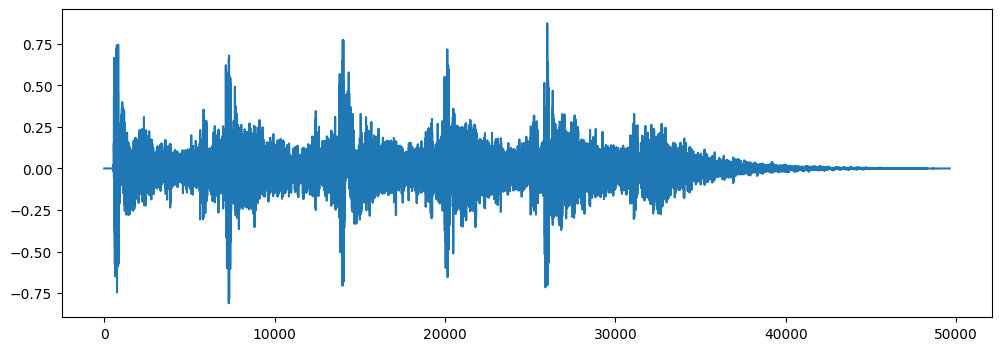

In [5]:
### Lets plot the librosa audio data
import matplotlib.pyplot as plt
# Original audio with 1 channel 
plt.figure(figsize=(12, 4))
plt.plot(librosa_audio_data)

In [6]:
### Lets read with scipy
from scipy.io import wavfile as wav
wave_sample_rate, wave_audio = wav.read(audio_file_path) 

In [7]:
wave_audio

array([[0, 0],
       [0, 0],
       [0, 0],
       ...,
       [1, 0],
       [1, 1],
       [0, 0]], dtype=int16)

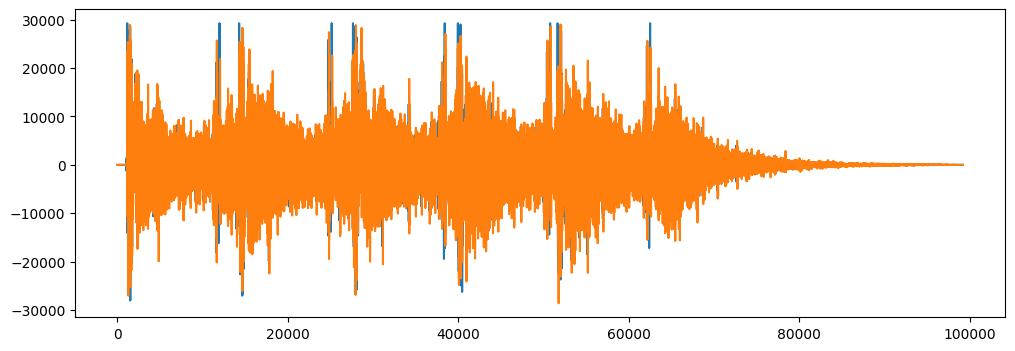

In [8]:
import matplotlib.pyplot as plt

# Original audio with 2 channels 
plt.figure(figsize=(12, 4))
plt.plot(wave_audio)

In [9]:
mfccs = librosa.feature.mfcc(y=librosa_audio_data, sr=librosa_sample_rate, n_mfcc=40)
print(mfccs.shape)

(40, 97)


In [10]:
mfccs

array([[-1.31082169e+02,  4.03164530e+00,  1.19681349e+01, ...,
        -5.69353333e+02, -5.91727539e+02, -6.10657715e+02],
       [ 3.54879074e+01,  2.86159668e+01,  1.63736534e+01, ...,
         4.30511932e+01,  2.58880405e+01,  1.28298645e+01],
       [-7.99004173e+00, -1.69152908e+01, -1.99511871e+01, ...,
        -1.11037188e+01, -7.55063152e+00,  2.01508373e-01],
       ...,
       [ 2.06391406e+00, -1.50670576e+00, -2.90424776e+00, ...,
         2.40957665e+00,  3.16997194e+00, -2.12651610e-01],
       [-1.14127045e+01, -1.10239248e+01, -8.20972443e+00, ...,
        -5.01983762e-02,  7.28949666e-01, -9.00576353e-01],
       [ 3.18555975e+00,  3.65157413e+00,  4.74613285e+00, ...,
        -2.06091928e+00, -2.23127031e+00, -1.77455056e+00]], dtype=float32)

In [11]:
#### Extracting MFCC's For every audio file
import pandas as pd
import os
import librosa

audio_dataset_path=r'I:\Audio_classification\UrbanSound8K\audio'
metadata=pd.read_csv(r'I:\Audio_classification\UrbanSound8K\metadata\UrbanSound8K.csv')
metadata.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [12]:
def features_extractor(file):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    
    return mfccs_scaled_features

In [13]:
import numpy as np
from tqdm import tqdm
### Now we iterate through every audio file and extract features 
### using Mel-Frequency Cepstral Coefficients
extracted_features=[]
for index_num,row in tqdm(metadata.iterrows()):
    file_name = os.path.join(os.path.abspath(audio_dataset_path),'fold'+str(row["fold"])+'/',str(row["slice_file_name"]))
    final_class_labels=row["class"]
    data=features_extractor(file_name)
    extracted_features.append([data,final_class_labels])

3554it [09:20,  6.67it/s]c:\Users\SAYAK\AppData\Local\Programs\Python\Python39\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1323
  return f(*args, **kwargs)
8324it [19:21, 10.18it/s]c:\Users\SAYAK\AppData\Local\Programs\Python\Python39\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1103
  return f(*args, **kwargs)
8327it [19:21, 13.29it/s]c:\Users\SAYAK\AppData\Local\Programs\Python\Python39\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1523
  return f(*args, **kwargs)
8732it [20:09,  7.22it/s]


In [14]:
### converting extracted_features to Pandas dataframe
extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','class'])
extracted_features_df.head()

,feature,class
0,"[-217.35526, 70.22338, -130.38527, -53.282898,...",dog_bark
1,"[-424.09818, 109.34077, -52.919525, 60.86475, ...",children_playing
2,"[-458.79114, 121.38419, -46.52066, 52.00812, -...",children_playing
3,"[-413.89984, 101.66373, -35.42945, 53.036354, ...",children_playing
4,"[-446.60352, 113.68541, -52.402206, 60.302044,...",children_playing


In [15]:
### Split the dataset into independent and dependent dataset
X=np.array(extracted_features_df['feature'].tolist())
y=np.array(extracted_features_df['class'].tolist())

In [54]:
### Label Encoding
#y=np.array(pd.get_dummies(y))

(8732, 10)

In [16]:
### Label Encoding
###y=np.array(pd.get_dummies(y))
### Label Encoder
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
y=to_categorical(labelencoder.fit_transform(y))

In [17]:
### Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [18]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [31]:
### No of classes
num_labels=y.shape[1]

In [20]:
model=Sequential()
###first layer
model.add(Dense(100,input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###second layer
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###third layer
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))

###final layer
model.add(Dense(num_labels))
model.add(Activation('softmax'))

In [21]:

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               4100      
                                                                 
 activation (Activation)     (None, 100)               0         
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 200)               20200     
                                                                 
 activation_1 (Activation)   (None, 200)               0         
                                                                 
 dropout_1 (Dropout)         (None, 200)               0         
                                                                 
 dense_2 (Dense)             (None, 100)               2

In [22]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [23]:
## Trianing my model
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime 

num_epochs = 100
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath='saved_models/audio_classification.hdf5', 
                               verbose=1, save_best_only=True)
start = datetime.now()

model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test), callbacks=[checkpointer], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/100
215/219 [============================>.] - ETA: 0s - loss: 11.6892 - accuracy: 0.1231
Epoch 1: val_loss improved from inf to 2.28008, saving model to saved_models\audio_classification.hdf5
219/219 [==============================] - 4s 10ms/step - loss: 11.5633 - accuracy: 0.1237 - val_loss: 2.2801 - val_accuracy: 0.1368
Epoch 2/100
216/219 [============================>.] - ETA: 0s - loss: 2.5704 - accuracy: 0.1437
Epoch 2: val_loss improved from 2.28008 to 2.25449, saving model to saved_models\audio_classification.hdf5
219/219 [==============================] - 2s 10ms/step - loss: 2.5683 - accuracy: 0.1439 - val_loss: 2.2545 - val_accuracy: 0.1448
Epoch 3/100
215/219 [============================>.] - ETA: 0s - loss: 2.3305 - accuracy: 0.1424
Epoch 3: val_loss improved from 2.25449 to 2.20002, saving model to saved_models\audio_classification.hdf5
219/219 [==============================] - 2s 11ms/step - loss: 2.3287 - accuracy: 0.1423 - val_loss: 2.2000 - val_accuracy: 0

In [32]:
test_accuracy=model.evaluate(X_test,y_test,verbose=0)
print(test_accuracy[1])

0.7813394665718079


In [29]:

model.predict(X_test)

55/55 [==============================] - 0s 1ms/step


array([[3.5671210e-03, 2.1301673e-03, 3.3304937e-02, ..., 6.7379674e-06,
        1.3242974e-03, 1.6874636e-02],
       [8.0803375e-08, 2.4330033e-02, 3.6335285e-03, ..., 5.8638898e-06,
        1.5288325e-03, 2.5555814e-02],
       [2.7457269e-05, 2.8651338e-02, 2.4186916e-04, ..., 1.2149304e-02,
        3.1730067e-04, 3.3977516e-02],
       ...,
       [2.7271668e-07, 9.2323041e-01, 1.4568336e-05, ..., 1.2532340e-06,
        8.8013127e-05, 7.2447285e-02],
       [1.5727498e-01, 1.1936326e-02, 3.6525720e-01, ..., 1.4627219e-02,
        2.2769142e-02, 2.4947663e-01],
       [1.4812692e-01, 2.1557741e-02, 2.1638685e-01, ..., 1.9356292e-02,
        9.0412103e-02, 1.6887674e-01]], dtype=float32)

In [57]:
filename=r"I:\Audio_classification\UrbanSound8K\audio\fold9\12812-5-0-0.wav"
prediction_feature=features_extractor(filename)
prediction_feature=prediction_feature.reshape(1,-1)
model.predict(prediction_feature)

1/1 [==============================] - 0s 33ms/step


array([[0.01819263, 0.06988696, 0.21711755, 0.10703891, 0.17416564,
        0.04467237, 0.02316131, 0.03394697, 0.01562793, 0.29618973]],
      dtype=float32)